In [679]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

In [680]:
# Only for Mac OS
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

In [681]:
# loading dataset
digits = load_digits()
X1, y1 = load_digits(return_X_y=True)

# creating Index from 0 to # of points in X1
ind_arr = np.arange(0,X1.shape[0])
print (ind_arr)

[   0    1    2 ... 1794 1795 1796]


In [682]:
np.random.shuffle(ind_arr)
print (ind_arr)

[1433 1648 1380 ... 1708 1479  631]


In [683]:
# reshuffled original data
X = X1[ind_arr]
y = y1[ind_arr]

In [684]:
# ind_digits will store all index of class 0, 1, ... , 9 
ind_digits = []

for i in range(10) :
  _, ind_i = np.where([y==i])
  ind_digits.append(ind_i)

Central data Preparation 

In [685]:
# Initial 30% data samples to central 
n_pts = int((X1.shape[0]*.3)/10)
print(n_pts)

53


In [686]:
dummy_list = []

for i in range(10) :
  ind = ind_digits[i][0:n_pts]
  dummy_list.extend(ind)  # extend so that 1D [ind[0], ind[1],...] array not like this [[ind]]

X_central = X[dummy_list]
y_central = y[dummy_list]

In [687]:
print(type(X_central))
print(X_central.shape)

print(type(y_central))
print(y_central.shape)

<class 'numpy.ndarray'>
(530, 64)
<class 'numpy.ndarray'>
(530,)


In [688]:
print(X_central.shape)
print(y_central.shape)

(530, 64)
(530,)


In [689]:
# 30% data ==> 66% training 33% testing
from sklearn.model_selection import train_test_split
X_central_train, X_central_test, y_central_train, y_central_test = train_test_split(X_central, y_central, test_size=0.33)

In [690]:
print(X_central_train.shape)
print(X_central_test.shape)
print(y_central_train.shape)
print(y_central_test.shape)

(355, 64)
(175, 64)
(355,)
(175,)


In [691]:
from keras.utils import np_utils

# one-hot encoding of output
y_central_train = np_utils.to_categorical(y_central_train,10)
y_central_test = np_utils.to_categorical(y_central_test,10)

print(X_central_test.shape)
print(y_central_test.shape)

(175, 64)
(175, 10)


In [692]:
from keras import layers, Model, regularizers
from tensorflow.keras import optimizers

In [693]:
"""
Input() is used to instantiate a Keras tensor.

A Keras tensor is a symbolic tensor-like object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.

For instance, if a, b and c are Keras tensors, it becomes possible to do: model = Model(input=[a, b], output=c)

"""

l1 = layers.Input(shape=(64,))

In [694]:
"""
Dense implements the operation: output = activation(dot(input, kernel) + bias) 
where activation is the element-wise activation function passed as the activation argument, 
      kernel is a weights matrix created by the layer, and 
      bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.
"""
l2 = layers.Dense(15, activation='sigmoid')(l1)

In [695]:
output = layers.Dense(10, activation='softmax')(l2)

In [696]:
model = Model(l1, output)

In [697]:
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 64)]              0         
                                                                 
 dense_37 (Dense)            (None, 15)                975       
                                                                 
 dense_38 (Dense)            (None, 10)                160       
                                                                 
Total params: 1,135
Trainable params: 1,135
Non-trainable params: 0
_________________________________________________________________


In [698]:
# regularization helps the neural network converge properly.
# Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function
l2_rate = 1e-4
for layer in model.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = regularizers.l2(l2_rate)
        layer.bias_regularizer = regularizers.l2(l2_rate)
        layer.activity_regularizer = regularizers.l2(l2_rate)

In [699]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9), metrics=['accuracy'])

In [700]:
model.fit(x=X_central_train, y=y_central_train, validation_data=(X_central_test,y_central_test), batch_size=100, epochs=100)
weights_central = model.get_weights()
model.save("model.h5")

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 2.5657 - accuracy: 0.1127 - val_loss: 2.2892 - val_accuracy: 0.1714
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 2.2439 - accuracy: 0.1662 - val_loss: 2.1859 - val_accuracy: 0.2229
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 2.1252 - accuracy: 0.2704 - val_loss: 2.0001 - val_accuracy: 0.2914
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.9466 - accuracy: 0.3437 - val_loss: 1.8432 - val_accuracy: 0.3714
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.7448 - accuracy: 0.4423 - val_loss: 1.7147 - val_accuracy: 0.4743
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.5816 - accuracy: 0.5577 - val_loss: 1.5640 - val_accuracy: 0.5771
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4292 - accuracy: 0.6254 - val_loss: 1.4286 - val_accuracy: 0.6000
Epoch 8/100
4/4 [=======

In [701]:
# finding out the type and shape of weights
print(type(weights_central))
print(len(weights_central))
print(len(weights_central[0]))
print(len(weights_central[0][0]))
print(len(weights_central[1]))
print(len(weights_central[2]))
print(len(weights_central[2][0]))
print(len(weights_central[3]))



<class 'list'>
4
64
15
15
15
10
10


# Create digitwise local data sets

In [702]:
local_Xy = []

for i in range(10) :

  ind_i = ind_digits[i][n_pts:]
  # print(ind_i)
  local_X = X[ind_i]
  local_y = y[ind_i]

  print (local_X.shape, local_y.shape)
  local_Xy.append((local_X,local_y))

(125, 64) (125,)
(129, 64) (129,)
(124, 64) (124,)
(130, 64) (130,)
(128, 64) (128,)
(129, 64) (129,)
(128, 64) (128,)
(126, 64) (126,)
(121, 64) (121,)
(127, 64) (127,)


In [703]:
from keras.models import load_model

In [704]:
l0_weights = np.zeros((64, 15), dtype="float32")
l1_weights = np.zeros((15,), dtype="float32")
l2_weights = np.zeros((15, 10), dtype="float32")
l3_weights = np.zeros((10,), dtype="float32")

for i in range(10) :
  # loading the model 
  model = load_model('model.h5')

  local_X, local_y = local_Xy[i]
  local_y = np_utils.to_categorical(local_y,10)

  model.fit(x=local_X, y=local_y, batch_size=100, epochs=100, verbose=0)
  temp_Wei = model.get_weights()

  # just to easy the calculation part
  l0_w = np.array(temp_Wei[0])
  l1_w = np.array(temp_Wei[1])
  l2_w = np.array(temp_Wei[2])
  l3_w = np.array(temp_Wei[3])
  
  l0_weights +=  l0_w
  l1_weights +=  l1_w
  l2_weights +=  l2_w
  l3_weights +=  l3_w
  

#DOING MEAN CAL

In [705]:
# Before calulation weights

print(l1_weights)
print(l1_weights)
print(l1_weights)
print(l1_weights)

updated_l0_w = l0_weights/10
updated_l1_w = l1_weights/10
updated_l2_w = l2_weights/10
updated_l3_w = l3_weights/10

# After Calculation weights

print(updated_l0_w)
print(updated_l1_w)
print(updated_l2_w)
print(updated_l3_w)


[ 0.03600358 -0.00883649  0.05985445  0.11704143 -0.0909074  -0.1785597
 -0.01107405 -0.40473926 -0.17898825 -0.02861921 -0.06610353 -0.04890189
  0.12401389 -0.03953564 -0.00688897]
[ 0.03600358 -0.00883649  0.05985445  0.11704143 -0.0909074  -0.1785597
 -0.01107405 -0.40473926 -0.17898825 -0.02861921 -0.06610353 -0.04890189
  0.12401389 -0.03953564 -0.00688897]
[ 0.03600358 -0.00883649  0.05985445  0.11704143 -0.0909074  -0.1785597
 -0.01107405 -0.40473926 -0.17898825 -0.02861921 -0.06610353 -0.04890189
  0.12401389 -0.03953564 -0.00688897]
[ 0.03600358 -0.00883649  0.05985445  0.11704143 -0.0909074  -0.1785597
 -0.01107405 -0.40473926 -0.17898825 -0.02861921 -0.06610353 -0.04890189
  0.12401389 -0.03953564 -0.00688897]
[[-1.21327862e-01  1.06535807e-01  1.99790373e-01 -1.97086662e-01
   2.33314365e-01 -9.24959127e-03 -2.31294304e-01 -1.98105931e-01
  -1.16617847e-02  1.51852414e-01 -2.12092906e-01  2.55177051e-01
   4.70163263e-02 -9.72089916e-02 -8.75048041e-02]
 [-2.73319446e-02  

#Updating Central Server

In [706]:
# creation of appropriate weights datatype
list0 = updated_l0_w.tolist()
list1 = updated_l1_w.tolist()
list2 = updated_l2_w.tolist()
list3 = updated_l3_w.tolist()

updated_Weights_Consolidated = []
updated_Weights_Consolidated.append(updated_l0_w)
updated_Weights_Consolidated.append(updated_l1_w)
updated_Weights_Consolidated.append(updated_l2_w)
updated_Weights_Consolidated.append(updated_l3_w)

In [707]:
# print(updated_Weights_Consolidated)
# print(weights_central)

# Updating the weights to the central server 
model.set_weights(updated_Weights_Consolidated)

In [708]:
model.fit(x=X_central_train, y=y_central_train, validation_data=(X_central_test,y_central_test), batch_size=100)

4/4 [==============================] - 0s 66ms/step - loss: 0.5590 - accuracy: 0.8225 - val_loss: 1.1223 - val_accuracy: 0.6571


In [709]:
predictions = model.predict(X_central_test)
print(predictions[3])

[7.9525932e-04 3.3795668e-03 4.3948996e-05 3.6484073e-06 9.0027843e-03
 1.7237983e-03 9.8324609e-01 1.1511470e-04 1.6531672e-03 3.6669633e-05]


In [710]:
def plot_prediction(index):
    print('predicted probabilities:')
    print(predictions[index])
    print('predicted category', np.argmax(predictions[index]))
    print('true probabilities:')
    print(y_central_test[index])
    print('true category', np.argmax(y_central_test[index]))
    img = X_central_test[index].reshape(8,8)
    plt.imshow(img)

predicted probabilities:
[9.4522012e-04 3.3970925e-03 7.7213816e-05 6.0443308e-06 6.7959735e-03
 2.2361979e-03 9.8458660e-01 2.2701720e-04 1.7017127e-03 2.6954678e-05]
predicted category 6
true probabilities:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
true category 6


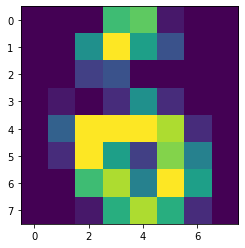

In [711]:
plot_prediction(9)